# Pymaceuticals Inc.
---

### Analysis

- Our analysis took a look at a data set from a study that was conducted on 249 mice with skin cancer tumors.  The study treated mice with 10 different drugs and our analysis broke down each drugs effectiveness at reducing tumor size.  We first eliminated a mouse with duplicate entries in the data set for the sake of data integrity.
-
- We then created a summary statistics table comparing the 10 different drugs and the volume of skin cancer tumors.  In doing so, we found that the drug Ramicane appeared to have the lowest average sized tumor in our treatment groups. Ramicane also had the lowest variance amongst the groups as well as the lowest standard error.  This indicates to me that there are not outliers present that are skewing the data for Ramicane. The drugs Neftasil, Naftisol and Stelasyn actually had a larger average sized tumor than our placebo group. This would indicate to me that these are not effective treatment options.
-
- We then created a series of bar graphs showing the treament group (drug) and how many timepoints or times the size of a tumor were recorded during the study. Next, we wanted to make sure that the data was evenly skewed by gender so we created a series of pie charts that show the distribution of gender in this study. We found that gender was relatively evenly distributed as male mice accounted for 51% and female mice accounted for 49%.

- We then created a box plot to directly compare the 4 highest performing drugs (by average tumor size) in the study. In doing so, we found that the drug Infubinol had a mouse in it's data set that had a much smaller tumor size than the rest of the Infubinol treatment group.  This would indicate to me that the drug Infubinol's average tumor size is likely lower than it would be without the presence of this outlier. It is very clear from the box plot that the top two performing drugs in this study are Ramicane and Capomulin.

- The last leg of our analysis wanted to exampine the drug Capomulin, as that is our drug of most interest. We picked a mouse at random, mouse l509, and created a line graph to show it's tumor volume over the course of the study. The graph shows that Capomulin did shring the size of mouse l509's tumors throughout the course of the study.  We then created a series of scatter plots that analyzed the whole treatment group of Capomulin and their average tumor size.  The scatter plot shows that there is a positive relationship between mouse weight and the size of a tumor on a mouse.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inLine

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousemergeDF =pd.merge(study_results, mouse_metadata, on="Mouse ID", how='inner')

# Display the data table for preview
mousemergeDF.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
miceCount = mousemergeDF['Mouse ID'].unique()
len(miceCount)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = mousemergeDF[mousemergeDF.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicateMiceIds = duplicateMice['Mouse ID'].unique()
print(duplicateMiceIds)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
specificMouseID = 'g989'
samemouseID = mousemergeDF[mousemergeDF['Mouse ID'].isin(['g989'])]
samemouseID

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouseDF = mousemergeDF.drop(mousemergeDF[mousemergeDF['Mouse ID'] == 'g989'].index)

In [7]:
# Checking the number of mice in the clean DataFrame.
newmiceCount = cleanmouseDF['Mouse ID'].unique()
print(len(newmiceCount))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meantumorVolume = cleanmouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mediantumorVolume = cleanmouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variancetumorVolume = cleanmouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdtumorVolume = cleanmouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
semtumorVolume = cleanmouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumorVolume = {
    "Mean Tumor Volume": meantumorVolume,
    "Median Tumor Volume": mediantumorVolume,
    "Tumor Volume Variance": variancetumorVolume,
    "Tumor Volume Std. Deviation": stdtumorVolume,
    "Tumor Volume Std. Error": semtumorVolume
}
tumorVolumeDF = pd.DataFrame(tumorVolume, columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Deviation",
                                                     "Tumor Volume Std. Error"])
tumorVolumeDF

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Deviation  Tumor Volume Std. Error  
Drug Regimen                                                        
Capomulin                        4.994774                 0.329346  
Ceftamin                         6.268188                 0.469821  
Infubinol                        6.567243                 0.492236  
Ketapril                         8.279709                 0.603860  
Naftisol                         8.134708                 0.596466  
Placebo                          7.821003                 0.581331  
Propriva                         6.622085                 0.544332  
Ramicane                         4.846308                 0.320955  
Stelasyn                         7.710419                 0.573111  
Zoniferol                        6.966589                 0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumorvolume = cleanmouseDF.groupby('Drug Regimen')
summary_stats = tumorvolume['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

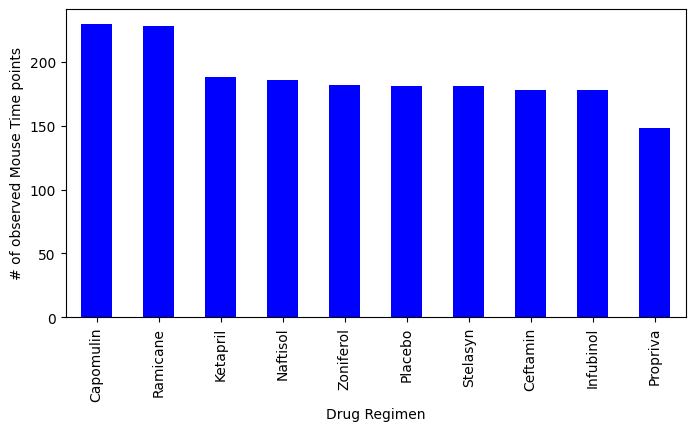

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouseTimepoints = cleanmouseDF.groupby('Drug Regimen').size()
sortedTimepoints = mouseTimepoints.sort_values(ascending=False)
sortedTimepoints.plot(kind='bar', color='blue', figsize=(8,4))
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Time points')
plt.show

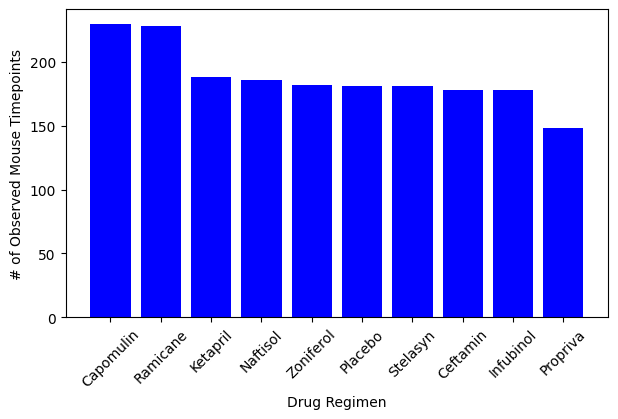

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouseTimepoints = cleanmouseDF.groupby('Drug Regimen').size()
sortedTimepoints = mouseTimepoints.sort_values(ascending=False)
drug_regimens = sortedTimepoints.index
counts = sortedTimepoints.values
plt.figure(figsize=(7, 4))
plt.bar(drug_regimens, counts, color='blue')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.show()

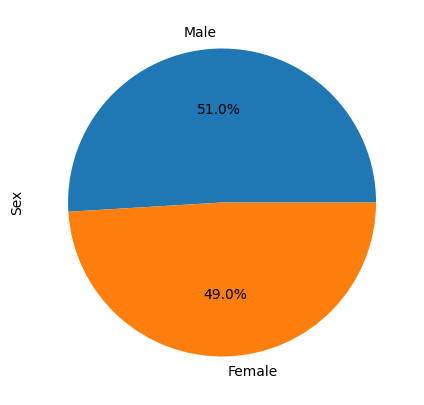

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderedmicecount = cleanmouseDF.groupby('Sex').size()
genderedmiceCount = genderedmicecount.sort_values(ascending=False)
genderedmiceCount.plot(kind='pie', y='sex', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Sex')
plt.show()

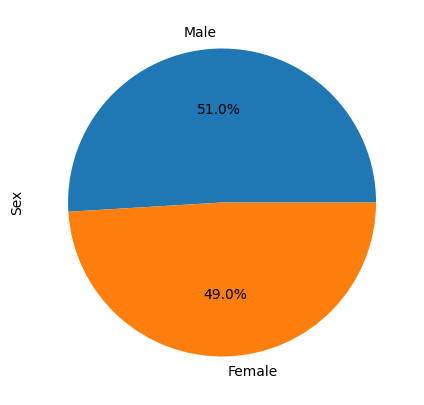

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderedmicecount = cleanmouseDF.groupby('Sex').size()
genderedmiceCount = genderedmicecount.sort_values(ascending=False)
Sex = genderedmiceCount.index
counts = genderedmiceCount.values
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=Sex, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaltumorVolume = cleanmouseDF.groupby('Mouse ID')['Timepoint'].max().reset_index()
finaltumorVolumeDF = pd.merge(finaltumorVolume, cleanmouseDF, on=['Mouse ID', 'Timepoint'], how='inner')
finaltumorVolumeDF

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumorvolumeData = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumorvolume = finaltumorVolumeDF.loc[finaltumorVolumeDF['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    #subset_df = pd.DataFrame()
    tumorvolumeData.append(tumorvolume)

    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([0.25, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    IQR = upperquartile - lowerquartile
    lowerbound = lowerquartile - 1.5 * IQR
    upperbound = upperquartile + 1.5 * IQR
    outliers = tumorvolume[(tumorvolume < lowerbound) | (tumorvolume > upperbound)]
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


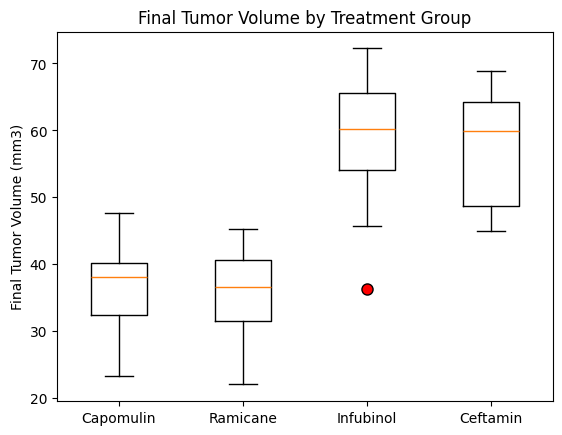

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumorvolumeData, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
ax1.set_title('Final Tumor Volume by Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint(Days)')

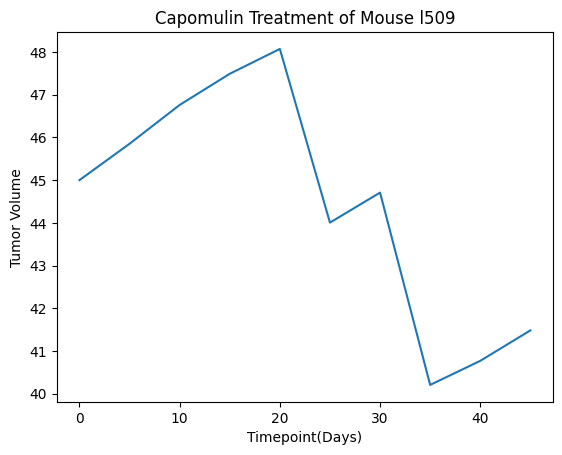

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousel509Data = cleanmouseDF[(cleanmouseDF['Drug Regimen'] == 'Capomulin') & (cleanmouseDF['Mouse ID'] == 'l509')]
plt.plot(mousel509Data['Timepoint'], mousel509Data["Tumor Volume (mm3)"])
plt.title('Capomulin Treatment of Mouse l509')
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint(Days)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

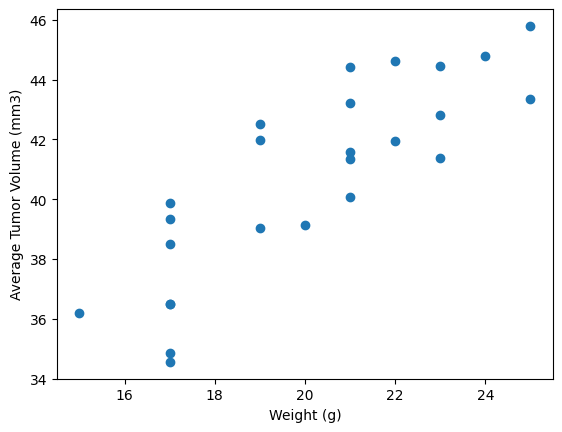

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinRegimen = cleanmouseDF[cleanmouseDF['Drug Regimen'] == 'Capomulin']
averagecapTumor = capomulinRegimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Weight = capomulinRegimen.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(Weight, averagecapTumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.841936342469472.


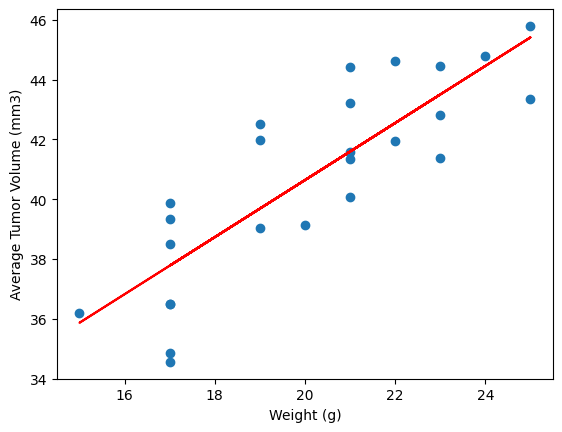

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
cCoefficient, p_value = stats.pearsonr(Weight, averagecapTumor)
print(f"The correlation coefficient between mouse weight and tumor volume is {cCoefficient}.")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, averagecapTumor)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(Weight,averagecapTumor)
plt.plot(Weight,regress_values,"r-")